---

#  Top Games on Google Playstore - EDA

---

 - In this study, we aimed to make an Exploratory Data Analysis (EDA) by using Top Games on Google Playstore dataset with very terse but clear explanations.

---

- We are going to start by importing the libraries we will be using during the study and then can start to explore our dataset.

- We are going to use both Seaborn and Plotly to have variety of visualization options.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import plotly 
import plotly.express as px
import plotly.graph_objs as go
import plotly.offline as py
from plotly.offline import iplot
from plotly.subplots import make_subplots
import plotly.figure_factory as ff

import warnings
warnings.filterwarnings("ignore")

## Overview Stage 

- Read the csv
- Use necessary functions to get basic informations about the dataset

In [113]:
df = pd.read_csv('android-games.csv')

In [3]:
df.head()

,rank,title,total ratings,installs,average rating,growth (30 days),growth (60 days),price,category,5 star ratings,4 star ratings,3 star ratings,2 star ratings,1 star ratings,paid
0,1,Garena Free Fire- World Series,86273129,500.0 M,4,2.1,6.9,0.0,GAME ACTION,63546766,4949507,3158756,2122183,12495915,False
1,2,PUBG MOBILE - Traverse,37276732,500.0 M,4,1.8,3.6,0.0,GAME ACTION,28339753,2164478,1253185,809821,4709492,False
2,3,Mobile Legends: Bang Bang,26663595,100.0 M,4,1.5,3.2,0.0,GAME ACTION,18777988,1812094,1050600,713912,4308998,False
3,4,Brawl Stars,17971552,100.0 M,4,1.4,4.4,0.0,GAME ACTION,13018610,1552950,774012,406184,2219794,False
4,5,Sniper 3D: Fun Free Online FPS Shooting Game,14464235,500.0 M,4,0.8,1.5,0.0,GAME ACTION,9827328,2124154,1047741,380670,1084340,False


- We basically can say that we have a dataset which is about top games in Google Playstore including the titles, average ratings, numbers of installation, ratings and the price of each game.

In [4]:
df.shape

(1730, 15)

- The dataset has 1730 rows and 15 columns.

- To have null values in a dataset and the number of null values have very crucial effect on analyzing.
- To be aware of the missing values, I would like to check the null values in the dataset.

In [14]:
df.isnull().sum()

rank                0
title               0
total ratings       0
installs            0
average rating      0
growth (30 days)    0
growth (60 days)    0
price               0
category            0
5 star ratings      0
4 star ratings      0
3 star ratings      0
2 star ratings      0
1 star ratings      0
paid                0
dtype: int64

- Even though having no null values in the dataset makes me very happy, it is very rare situatin in the ral world.
- Since it is kind of a dream dataset, let's enjoy it together :)

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1730 entries, 0 to 1729
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   rank              1730 non-null   int64  
 1   title             1730 non-null   object 
 2   total ratings     1730 non-null   int64  
 3   installs          1730 non-null   object 
 4   average rating    1730 non-null   int64  
 5   growth (30 days)  1730 non-null   float64
 6   growth (60 days)  1730 non-null   float64
 7   price             1730 non-null   float64
 8   category          1730 non-null   object 
 9   5 star ratings    1730 non-null   int64  
 10  4 star ratings    1730 non-null   int64  
 11  3 star ratings    1730 non-null   int64  
 12  2 star ratings    1730 non-null   int64  
 13  1 star ratings    1730 non-null   int64  
 14  paid              1730 non-null   bool   
dtypes: bool(1), float64(3), int64(8), object(3)
memory usage: 191.0+ KB


- According to output of info function, since we have mainly integers and the floats as data types, I can say that we have a easy-to-analyze dataset.
- Another point which takes my attention immeadiately is that, even though 'installs' column exhibits the number of installation, it has object Dtype. 
- To avoid potential problems, we better change the type to integer or float.

In [16]:
df.describe()

,rank,total ratings,average rating,growth (30 days),growth (60 days),price,5 star ratings,4 star ratings,3 star ratings,2 star ratings,1 star ratings
count,1730.000000,1.730000e+03,1730.000000,1730.000000,1730.000000,1730.000000,1.730000e+03,1.730000e+03,1.730000e+03,1.730000e+03,1.730000e+03
mean,50.386705,1.064332e+06,3.908092,321.735896,122.554971,0.010942,7.622315e+05,1.164366e+05,5.706307e+04,2.710336e+04,1.014950e+05
std,28.936742,3.429250e+06,0.290973,6018.914507,2253.891703,0.214987,2.538658e+06,3.021631e+05,1.495314e+05,8.154542e+04,4.083745e+05
min,1.000000,3.299300e+04,2.000000,0.000000,0.000000,0.000000,1.397500e+04,2.451000e+03,7.180000e+02,2.660000e+02,5.450000e+02
25%,25.000000,1.759992e+05,4.000000,0.100000,0.200000,0.000000,1.277300e+05,2.064300e+04,9.652500e+03,4.262250e+03,1.281200e+04
50%,50.000000,4.286065e+05,4.000000,0.500000,1.000000,0.000000,2.964340e+05,5.098050e+04,2.507800e+04,1.067550e+04,3.368600e+04
75%,75.000000,8.837970e+05,4.000000,1.700000,3.300000,0.000000,6.198358e+05,1.018140e+05,5.229500e+04,2.322875e+04,8.015725e+04
max,100.000000,8.627313e+07,4.000000,227105.700000,69441.400000,7.490000,6.354677e+07,5.404966e+06,3.158756e+06,2.122183e+06,1.249592e+07


To summarize what we have got so far ;
- We have got a dataset which has 1730 rows and 15 columns, about detailed information related top games on Google Playstore.
- Since we don't have any null values and most commonly have numeric values, we are not going to need to many adjustments.
- Even though it looks quite all right, to make an adjustment on the install column will make analyzing easier.
- Another point that we might need to take care is that price and paid column have a lot in common. Most likely to study with one od them is going to be enough, which means we should drop one of them.
- Just for further steps, to have in mind, we should be aware of the uneven distribution of the price column and the possible outliers on the rank column.

- Let's start with making making necessary adjustments. 

In [114]:
df['installs'].value_counts()

10.0 M      805
50.0 M      252
5.0 M       245
100.0 M     204
1.0 M       192
500.0 k      15
500.0 M      12
100.0 k       3
1000.0 M      2
Name: installs, dtype: int64

In [115]:
def in_thousand(install):
    if install == '500.0 k':
        return '0.5 M'
    elif install == '100.0 k':
        return '0.1 M'
    else:
        return install

In [116]:
df['installs']= df['installs'].apply(in_thousand)

df['installs']= df['installs'].str.replace( 'M', '').str.strip().astype('float')

df= df.rename(columns={'installs': 'installs_in_million'})
df['installs_in_million'].value_counts()

10.0      805
50.0      252
5.0       245
100.0     204
1.0       192
0.5        15
500.0      12
0.1         3
1000.0      2
Name: installs_in_million, dtype: int64

- As a second step let's see the price and paid columns and decide which one is more necessary to continue with.

In [117]:
df['price'].value_counts()

0.00    1723
1.99       3
1.49       1
0.99       1
2.99       1
7.49       1
Name: price, dtype: int64

In [118]:
df['paid'].value_counts()

False    1723
True        7
Name: paid, dtype: int64

- When we look at the price of the games almost %99 percent is free and there is not much number of sample in different prices to compares them by price.
- Because of all this reason we can drop the price column since it doesn't have much to do with.
- For coming steps first we are going to drop the price column.
- Dropping a column or a row is one thing that we need to be very careful as making that decision.

In [119]:
df.drop('price', axis=1, inplace=True)

In [120]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1730 entries, 0 to 1729
Data columns (total 14 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   rank                 1730 non-null   int64  
 1   title                1730 non-null   object 
 2   total ratings        1730 non-null   int64  
 3   installs_in_million  1730 non-null   float64
 4   average rating       1730 non-null   int64  
 5   growth (30 days)     1730 non-null   float64
 6   growth (60 days)     1730 non-null   float64
 7   category             1730 non-null   object 
 8   5 star ratings       1730 non-null   int64  
 9   4 star ratings       1730 non-null   int64  
 10  3 star ratings       1730 non-null   int64  
 11  2 star ratings       1730 non-null   int64  
 12  1 star ratings       1730 non-null   int64  
 13  paid                 1730 non-null   bool   
dtypes: bool(1), float64(3), int64(8), object(2)
memory usage: 177.5+ KB


- Let's move on to the **analysis part**.

## Analysis Part

- As a first step I will look at the game catogories.

In [121]:
df['category'].value_counts(normalize=True)

GAME CARD            0.072832
GAME WORD            0.060116
GAME ARCADE          0.057803
GAME EDUCATIONAL     0.057803
GAME RACING          0.057803
GAME ACTION          0.057803
GAME ROLE PLAYING    0.057803
GAME CASINO          0.057803
GAME ADVENTURE       0.057803
GAME BOARD           0.057803
GAME SPORTS          0.057803
GAME CASUAL          0.057803
GAME TRIVIA          0.057803
GAME STRATEGY        0.057803
GAME PUZZLE          0.057803
GAME MUSIC           0.057803
GAME SIMULATION      0.057803
Name: category, dtype: float64

- Even though many of thm have the same size, Game Card and the Game Word categories are little more than the others.

- For visualization I will be using both Seaborn and Plotly.

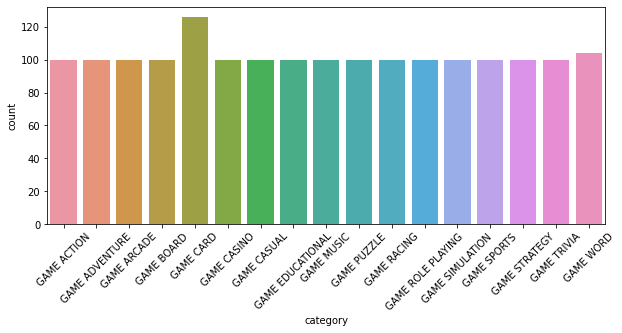

In [123]:
#with Seaborn

plt.figure(figsize=(10,4))
sns.countplot(x = "category", data = df)
plt.xticks(rotation = 45);

In [125]:
#withPlotly

fig = px.histogram(df, x="category", title='Game Categories')
fig.update_layout(xaxis={'categoryorder':'total descending'})
fig.show()

- As we said before they all have almost the same size only the two categories are slightly more than the others.

## Total Ratings

In [127]:
df['total ratings'].describe()

count    1.730000e+03
mean     1.064332e+06
std      3.429250e+06
min      3.299300e+04
25%      1.759992e+05
50%      4.286065e+05
75%      8.837970e+05
max      8.627313e+07
Name: total ratings, dtype: float64

- First thing drew my attention is the difference between mean and Q2.
- If we have a look at the max, we easily can say thay possible outliers caused that difference.
- Even though to see the outliers it is best way to use boxplot, I will be using both boxplot and the histogram.

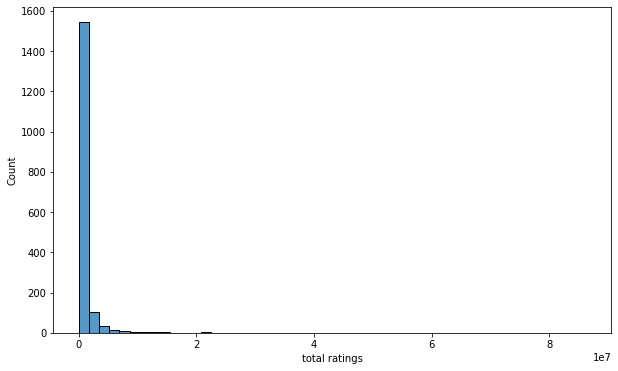

In [128]:
#Histogram with Seaborn

plt.figure(figsize = (10,6))
sns.histplot(df['total ratings'], bins = 50);

In [129]:
#Histogram with Plotly


fig = px.histogram(df, x= 'total ratings', title='Total Ratings of the Games')

fig.show()

- It gives some information about the values but to see outliers let's use boxplot.

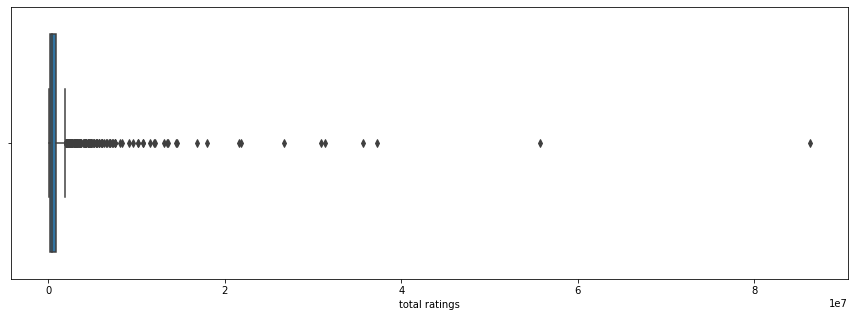

In [131]:
#Boxplot with Seaborn

plt.figure(figsize=(15,5))
sns.boxplot(data=df, x ="total ratings");

- Seaborn is more popular than Plotly but we can not get some certain inf about the certain values.

In [133]:
#Boxplot with Plotly

fig = px.box(df, x= 'total ratings', hover_data = df[['title','category']])
fig.update_traces(quartilemethod="inclusive")
fig.show()

- As we have seen in the histogram, quite a lot of the ratings are in the 0 - 500.000 ratings range.
- On the other hand ve have quite a number of outliers, which increases mean and put it further away from the median.
- The difference between mean and the median which is made by outliers from max side another way to say that we have highly right skewed distribution.
- Instead of using mean values, using the meadian is going to make much more sense for further analysis.

## Number of Game Install

In [134]:
df['installs_in_million'].describe()

count    1730.000000
mean       29.176185
std        60.287333
min         0.100000
25%         5.000000
50%        10.000000
75%        50.000000
max      1000.000000
Name: installs_in_million, dtype: float64

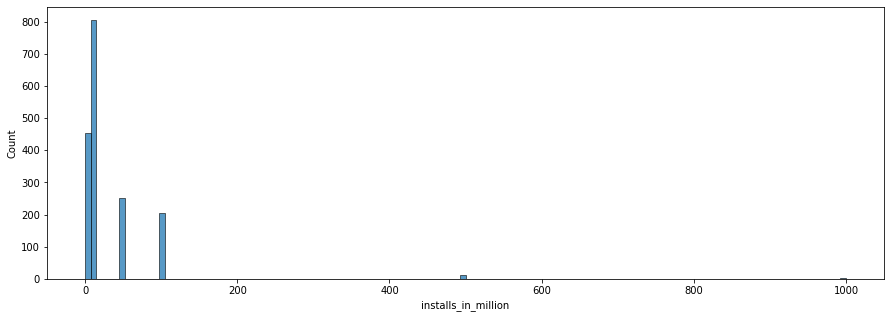

In [138]:
plt.figure(figsize=(15,5))
sns.histplot(data=df, x ="installs_in_million");

In [136]:
fig = px.histogram(df, x= 'installs_in_million', title='Number of Game Install in Millions')

fig.show()

In [139]:
fig = px.box(df, x= 'installs_in_million', hover_data = df[['title','category']])
fig.update_traces(quartilemethod="inclusive")
fig.show()

- We have rightly skewed distribution with possible outliers.
- Candy Crush Saga with  1 Billion install and Clash of Clans with 500 Million installs shown in the box plot.
- Size of the outliers definitely affect  mean value and distributions.
- As mentioned above, it would be a good idea to use median based approach.

## Paid & Free Games

In [141]:
df['paid'].value_counts(normalize=True)

False    0.995954
True     0.004046
Name: paid, dtype: float64

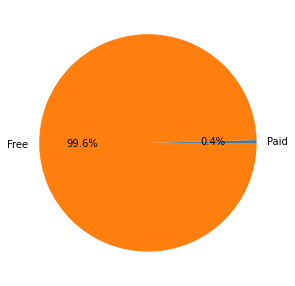

In [142]:
values = [7, 1723]
index = ["Paid", "Free"]

plt.figure(figsize=(7,5))
y = values
mylabels = index
myexplode = [0, 0]

plt.pie(y, labels = mylabels, labeldistance=1.1, explode = myexplode, startangle=0, autopct='%1.1f%%')

plt.show()

In [143]:
paid_free= df['paid'].value_counts()
label =['Free','Paid']
fig = px.pie(paid_free, values=df['paid'].value_counts().values, names=label,
             title='Paid & Free Games')
fig.update_traces(textposition='inside', textinfo='percent+label')
fig.show()

- Almost all the games except 7 in this dataset are free games.

- Now, It is time to deep diving into our dataset.

## Total Ratings by Category

- To see the total ratings for each category we are going to use groupby function in Pandas.

In [144]:
total_ratings_by_category = df.groupby('category')['total ratings'].mean()
total_ratings_by_category

category
GAME ACTION          4.011344e+06
GAME ADVENTURE       8.935617e+05
GAME ARCADE          1.793780e+06
GAME BOARD           4.457431e+05
GAME CARD            3.326041e+05
GAME CASINO          3.619031e+05
GAME CASUAL          2.470866e+06
GAME EDUCATIONAL     1.529804e+05
GAME MUSIC           2.163020e+05
GAME PUZZLE          9.466929e+05
GAME RACING          1.139027e+06
GAME ROLE PLAYING    7.087648e+05
GAME SIMULATION      9.341417e+05
GAME SPORTS          1.353829e+06
GAME STRATEGY        1.856570e+06
GAME TRIVIA          2.982217e+05
GAME WORD            3.943603e+05
Name: total ratings, dtype: float64

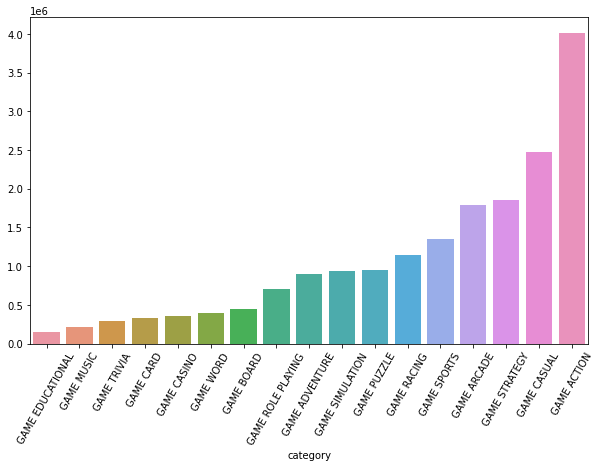

In [162]:
plt.figure(figsize=(10,6))

sns.barplot(data = df, x = total_ratings_by_category.index, y = total_ratings_by_category.values)
plt.xticks(rotation = 60);
plt.show()

In [163]:
fig = px.bar(total_ratings_by_category, x= total_ratings_by_category.index, y=total_ratings_by_category.values, labels={'y':'Total Ratings'})
fig.update_layout(xaxis={'categoryorder':'total descending'})
fig.show()

- Game Action has way more total ratings copared with the others.

## Number of Installation by Category

In [169]:
install_by_category = df.groupby('category')['installs_in_million'].mean().sort_values(ascending =False)
install_by_category

category
GAME ACTION          74.100000
GAME ARCADE          71.610000
GAME CASUAL          63.970000
GAME RACING          46.750000
GAME PUZZLE          36.210000
GAME SPORTS          33.610000
GAME SIMULATION      27.710000
GAME STRATEGY        23.910000
GAME BOARD           21.230000
GAME ADVENTURE       18.030000
GAME EDUCATIONAL     17.895000
GAME ROLE PLAYING    14.080000
GAME MUSIC           12.487000
GAME CARD            12.484127
GAME WORD            12.317308
GAME CASINO           7.715000
GAME TRIVIA           6.901000
Name: installs_in_million, dtype: float64

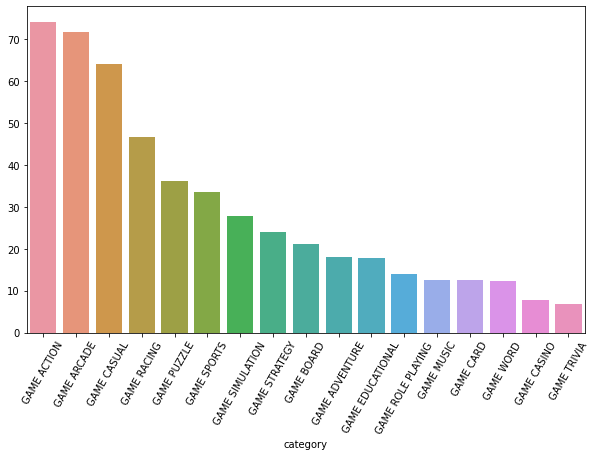

In [170]:
plt.figure(figsize=(10,6))

sns.barplot(data = df, x = install_by_category.index, y = install_by_category.values)
plt.xticks(rotation = 60);
plt.show()

In [171]:
fig = px.bar(install_by_category, x= install_by_category.index, y=install_by_category.values, labels={'y':'Install in Millions'})
fig.update_layout(xaxis={'categoryorder':'total descending'})
fig.show()

- Games in the action, arcade and casual categories are installed significantly more than games in the trivia, casino and word categories.

In [182]:
growth_by_category_30 = df.groupby('category')['growth (30 days)'].mean().sort_values(ascending = True)
growth_by_category_30

category
GAME SIMULATION        13.406000
GAME STRATEGY          18.281000
GAME ACTION            18.808000
GAME WORD              22.433654
GAME MUSIC             24.626000
GAME BOARD             34.445000
GAME CASUAL            36.020000
GAME PUZZLE            44.362000
GAME ARCADE            58.924000
GAME EDUCATIONAL      102.455000
GAME SPORTS           159.543000
GAME RACING           207.103000
GAME ROLE PLAYING     209.979000
GAME ADVENTURE        259.101000
GAME CARD             746.598413
GAME TRIVIA          1079.680000
GAME CASINO          2335.253000
Name: growth (30 days), dtype: float64

In [174]:
fig = px.bar(growth_by_category_30, x= growth_by_category_30.index, y=growth_by_category_30, labels={'y':'Growth in 30 days'})
fig.update_layout(xaxis={'categoryorder':'total descending'})
fig.show()

- Even though games in the action categories get more ratings and were installed more than games in the other categories, games in the casino category have more growth in 30 days. 

## Top 5 Ranked Games By Category

In [183]:
top_ranked_games = df[df['rank']<6][['rank','title','category', 'total ratings', 'installs_in_million', '5 star ratings']]
top_ranked_games

,rank,title,category,total ratings,installs_in_million,5 star ratings
0,1,Garena Free Fire- World Series,GAME ACTION,86273129,500.0,63546766
1,2,PUBG MOBILE - Traverse,GAME ACTION,37276732,500.0,28339753
2,3,Mobile Legends: Bang Bang,GAME ACTION,26663595,100.0,18777988
3,4,Brawl Stars,GAME ACTION,17971552,100.0,13018610
4,5,Sniper 3D: Fun Free Online FPS Shooting Game,GAME ACTION,14464235,500.0,9827328
...,...,...,...,...,...,...
1626,1,كلمات كراش - لعبة تسلية وتحدي من زيتونة,GAME WORD,2418119,10.0,2115189
1627,2,Word Cookies!®,GAME WORD,2250585,10.0,1679256
1628,3,Words of Wonders: Crossword to Connect Vocabulary,GAME WORD,1885400,100.0,1457939
1629,4,Words with Friends Classic: Word Puzzle Challenge,GAME WORD,1722914,50.0,971880


## Top 20 Games

In [184]:
top_20 = df.sort_values(by='installs_in_million', ascending=False).head(20)
top_20

,rank,title,total ratings,installs_in_million,average rating,growth (30 days),growth (60 days),category,5 star ratings,4 star ratings,3 star ratings,2 star ratings,1 star ratings,paid
200,1,Subway Surfers,35665901,1000.0,4,0.5,1.0,GAME ARCADE,27138572,3366600,1622695,814890,2723142,False
626,1,Candy Crush Saga,31367945,1000.0,4,0.9,1.6,GAME CASUAL,23837448,4176798,1534041,486005,1333650,False
0,1,Garena Free Fire- World Series,86273129,500.0,4,2.1,6.9,GAME ACTION,63546766,4949507,3158756,2122183,12495915,False
207,8,Temple Run,4816448,500.0,4,0.7,1.5,GAME ARCADE,3184391,438320,318164,204384,671187,False
1426,1,Clash of Clans,55766763,500.0,4,0.3,1.0,GAME STRATEGY,43346128,5404966,2276203,971321,3768141,False
1026,1,Hill Climb Racing,10188038,500.0,4,0.4,0.8,GAME RACING,7148370,982941,607603,338715,1110407,False
1326,1,8 Ball Pool,21632735,500.0,4,1.2,630.8,GAME SPORTS,16281475,2268294,1017204,425693,1640067,False
630,5,Pou,11506051,500.0,4,0.2,0.5,GAME CASUAL,8175679,1051014,688712,346244,1244400,False
628,3,My Talking Angela,13050503,500.0,4,0.6,1.4,GAME CASUAL,9165205,1073761,636763,399662,1775110,False
1,2,PUBG MOBILE - Traverse,37276732,500.0,4,1.8,3.6,GAME ACTION,28339753,2164478,1253185,809821,4709492,False


In [185]:
fig = px.bar(top_20, x= 'title', y='installs_in_million', hover_data = top_20[['5 star ratings']], color='category')
fig.update_layout(xaxis={'categoryorder':'total descending'})
fig.show()

- While the top 2 games have 1 Billion installation, following 12 games have 500 million installations.
- Since the installation for top 2 games are very high, I would like to see the realtion between Intallation and the total ratings. 

In [188]:
fig = px.scatter(top_20, x= 'installs_in_million', y='total ratings', hover_data = top_20[['5 star ratings']], color='category')
fig.update_layout(xaxis={'categoryorder':'total descending'})
fig.show()

In [189]:
fig = px.bar(top_20, x= 'title', y='total ratings', hover_data = top_20[['5 star ratings']], color='category')
fig.update_layout(xaxis={'categoryorder':'total descending'})
fig.show()

- As we see on the both scatter and bar plot, having the most number of installation doesn't mean to have the most number of ratings.
- To compare by the numbers ; While Candy Crush Saga and Subway Surfers have 1 billion installations, they have 31 and 35 million total ratings in order.
- On the other hand Gerena Free Fire - World Series has 500 million installation which is half of the both Candy Crush Saga and the Subway Surfers, it has 86 million total ratings which is almost three times the total ratings for both Candy Crush Saga and the Subway Surfers.

---

 - All these were what I wanted to mention about the dataset.
 - Thank you for the dataset contributor for sharing this data which I had pleasure working on.
 - Since this is my first project on the Kaggle, I m so happy to share it with you.
 - Thank you for your time.I hope you all like it.
 


---

___All the best !___